Verificare che il server sia attivo!

In [1]:
print("Hello World!")

Hello World!


### Eseguo gli import

In [2]:
import cv2
import numpy as np
import scipy
import scipy.signal
print(scipy.signal)
print(scipy.__version__)
print(cv2.__version__)
print(np.__version__)

<module 'scipy.signal' from '/Users/gabrieletassinari/Desktop/BarcodeVerification/venv/lib/python3.10/site-packages/scipy/signal/__init__.py'>
1.7.3
4.10.0
1.21.6


In [3]:
import sys
import os
import pathlib

src_path = '/Users/gabrieletassinari/Desktop/BarcodeVerification/src/'

if src_path not in sys.path:
    sys.path.append(src_path)

print(f"sys.path: {sys.path}")

from compute_barcode import compute_barcode


print("Success")

sys.path: ['/Users/gabrieletassinari/miniconda3/lib/python310.zip', '/Users/gabrieletassinari/miniconda3/lib/python3.10', '/Users/gabrieletassinari/miniconda3/lib/python3.10/lib-dynload', '', '/Users/gabrieletassinari/Desktop/BarcodeVerification/venv/lib/python3.10/site-packages', '/Users/gabrieletassinari/Desktop/BarcodeVerification/src/']
Success


### Occorre eliminare dal dataset fornito il file di excel: TestChart.xls

In [4]:
from os import listdir
from os.path import isfile, join

# Definisci il percorso della cartella
folder_path = '/Users/gabrieletassinari/Desktop/BarcodeVerification/dati'

# Crea la lista di file escludendo 'TestChart.xls'
images_paths = [f for f in listdir(folder_path) 
                if isfile(join(folder_path, f)) and f != 'TestChart.xls']

print(images_paths)
print(len(images_paths))

['EAN-UPC-UPC-A MASTER GRADE IMGB.BMP', 'UPC#14.BMP', 'UPC#28.BMP', 'UPC#29.BMP', 'UPC#15.BMP', 'UPC#01.BMP', 'EAN128-CONTRAST IMGB.BMP', 'UPC#17.BMP', 'UPC#03.BMP', 'UPC#16.BMP', 'UPC#12.BMP', 'UPC#06.BMP', 'UPC#07.BMP', 'UPC#13.BMP', 'EAN128-LOW DECODABILITY IMGB.BMP', 'UPC#05.BMP', 'UPC#11.BMP', 'I25-MASTER GRADE IMGB.BMP', 'I25-LOW DECODABILITY IMGB.BMP', 'C39_7.5UP.BMP', 'C39_4.4UP.BMP', 'UPC#10.BMP', 'UPC#04.BMP', 'EAN-UPC-EAN-13 MASTER GRADE IMGB.BMP', 'EAN-UPC-CONTRAST IMGB.BMP', 'EAN-UPC-DECODABILITY IMGB.BMP', 'I25-CONTRAST IMGB.BMP', 'I25-DEFECTS IMGB.BMP', 'C128_4.4UP.BMP', 'C128_7.5UP.BMP', 'EAN128-MASTER IMGB.BMP', 'EAN-UPC-DEFECTS IMGB.BMP', 'UPC#21.BMP', 'UPC#09.BMP', 'UPC#08.BMP', 'UPC#20.BMP', 'C39_7.5LOW.BMP', 'UPC#22.BMP', 'EAN128-DEFECTS IMGB.BMP', 'UPC#23.BMP', 'C128_4.4LOW.BMP', 'UPC#27.BMP', 'C39_4.4LOW.BMP', 'UPC#26.BMP', 'UPC#32.BMP', 'UPC#18.BMP', 'UPC#24.BMP', 'UPC#30.BMP', 'C128_7.5LOW.BMP', 'UPC#31.BMP', 'UPC#25.BMP', 'UPC#19.BMP']
52


### Tests per ogni immagine

In [5]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[0]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
print(overall_quality_parameters_dict)

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/EAN-UPC-UPC-A MASTER GRADE IMGB.BMP

{'scanline_0': {'R_min': 6.2745098039215685, 'R_min_grade': 'A', 'SC': 80.0, 'SC_grade': 'A', 'EC_min': 56.862745098039206, 'EC_min_grade': 'A', 'MODULATION': 0.7107843137254901, 'MODULATION_grade': 'A', 'DEFECT': 0.10784313725490198, 'DEFECT_grade': 'A', 'scanline_grade': 'A', 'scanline_value': 4, 'n_edges': 62}, 'scanline_1': {'R_min': 7.0588235294117645, 'R_min_grade': 'A', 'SC': 80.0, 'SC_grade': 'A', 'EC_min': 58.4313725490196, 'EC_min_grade': 'A', 'MODULATION': 0.730392156862745, 'MODULATION_grade': 'A', 'DEFECT': 0.1421568627450979, 'DEFECT_grade': 'A', 'scanline_grade': 'A', 'scanline_value': 4, 'n_edges': 62}, 'scanline_2': {'R_min': 6.2745098039215685, 'R_min_grade': 'A', 'SC': 81.96078431372548, 'SC_grade': 'A', 'EC_min': 58.8235294117647, 'EC_min_grade': 'A', 'MODULATION': 0.7177033492822966, 'MODULATION_grade': 'A', 'DEFECT': 0.08133971291866018, 'DEFECT_grade': 'A', 'scanline_gr

Per stampare meglio l'output:

In [6]:
def pretty_print(overall_quality_parameters_dict):
    n_scanlines = 10
    print('Scanline grades:', [overall_quality_parameters_dict[f'scanline_{i}']['scanline_grade'] 
                               for i in range(n_scanlines)])

    print('OVERALL_NUMERICAL_VALUE:', overall_quality_parameters_dict['OVERALL_NUMERICAL_VALUE'])
    print('OVERALL_NUMERICAL_GRADE:', overall_quality_parameters_dict['OVERALL_SYMBOL_GRADE'])
    print()

    print('R_min_MEAN:', overall_quality_parameters_dict['R_min_MEAN'])
    print('R_min_MEAN_grade:', overall_quality_parameters_dict['R_min_MEAN_grade'])
    print()

    print('SC_MEAN:', overall_quality_parameters_dict['SC_MEAN'])
    print('SC_MEAN_grade:', overall_quality_parameters_dict['SC_MEAN_grade'])
    print()

    print('EC_min_MEAN:', overall_quality_parameters_dict['EC_min_MEAN'])
    print('EC_min_MEAN_grade:', overall_quality_parameters_dict['EC_min_MEAN_grade'])
    print()

    print('MODULATION_MEAN:', overall_quality_parameters_dict['MODULATION_MEAN'])
    print('MODULATION_MEAN_grade:', overall_quality_parameters_dict['MODULATION_MEAN_grade'])
    print()

    print('DEFECT_MEAN:', overall_quality_parameters_dict['DEFECT_MEAN'])
    print('DEFECT_MEAN_grade:', overall_quality_parameters_dict['DEFECT_MEAN_grade'])

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/EAN-UPC-UPC-A MASTER GRADE IMGB.BMP

Scanline grades: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'D']
OVERALL_NUMERICAL_VALUE: 3.7
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 6.901960784313727
R_min_MEAN_grade: A

SC_MEAN: 80.66666666666666
SC_MEAN_grade: A

EC_min_MEAN: 56.549019607843135
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7015201065726353
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.09245870305046847
DEFECT_MEAN_grade: A


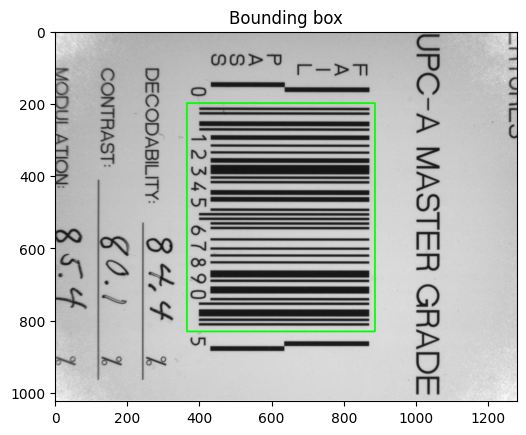

({'bb_points_sorted': array([[365., 199.],
         [886., 199.],
         [365., 831.],
         [886., 831.]], dtype=float32),
  'bb_width': 521,
  'bb_height': 632,
  'threshold': 124.0},
 {'image_rot': array([[[255, 255, 255],
          [232, 232, 232],
          [225, 225, 225],
          ...,
          [192, 192, 192],
          [197, 197, 197],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [231, 231, 231],
          [235, 235, 235],
          ...,
          [203, 203, 203],
          [216, 216, 216],
          [255, 255, 255]],
  
         [[255, 255, 255],
          [237, 237, 237],
          [233, 233, 233],
          ...,
          [207, 207, 207],
          [215, 215, 215],
          [255, 255, 255]],
  
         ...,
  
         [[255, 255, 255],
          [233, 233, 233],
          [245, 245, 245],
          ...,
          [104, 104, 104],
          [ 95,  95,  95],
          [150, 150, 150]],
  
         [[255, 255, 255],
          [237, 237, 237],
 

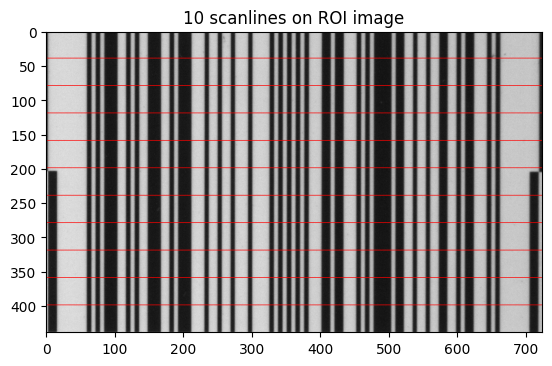

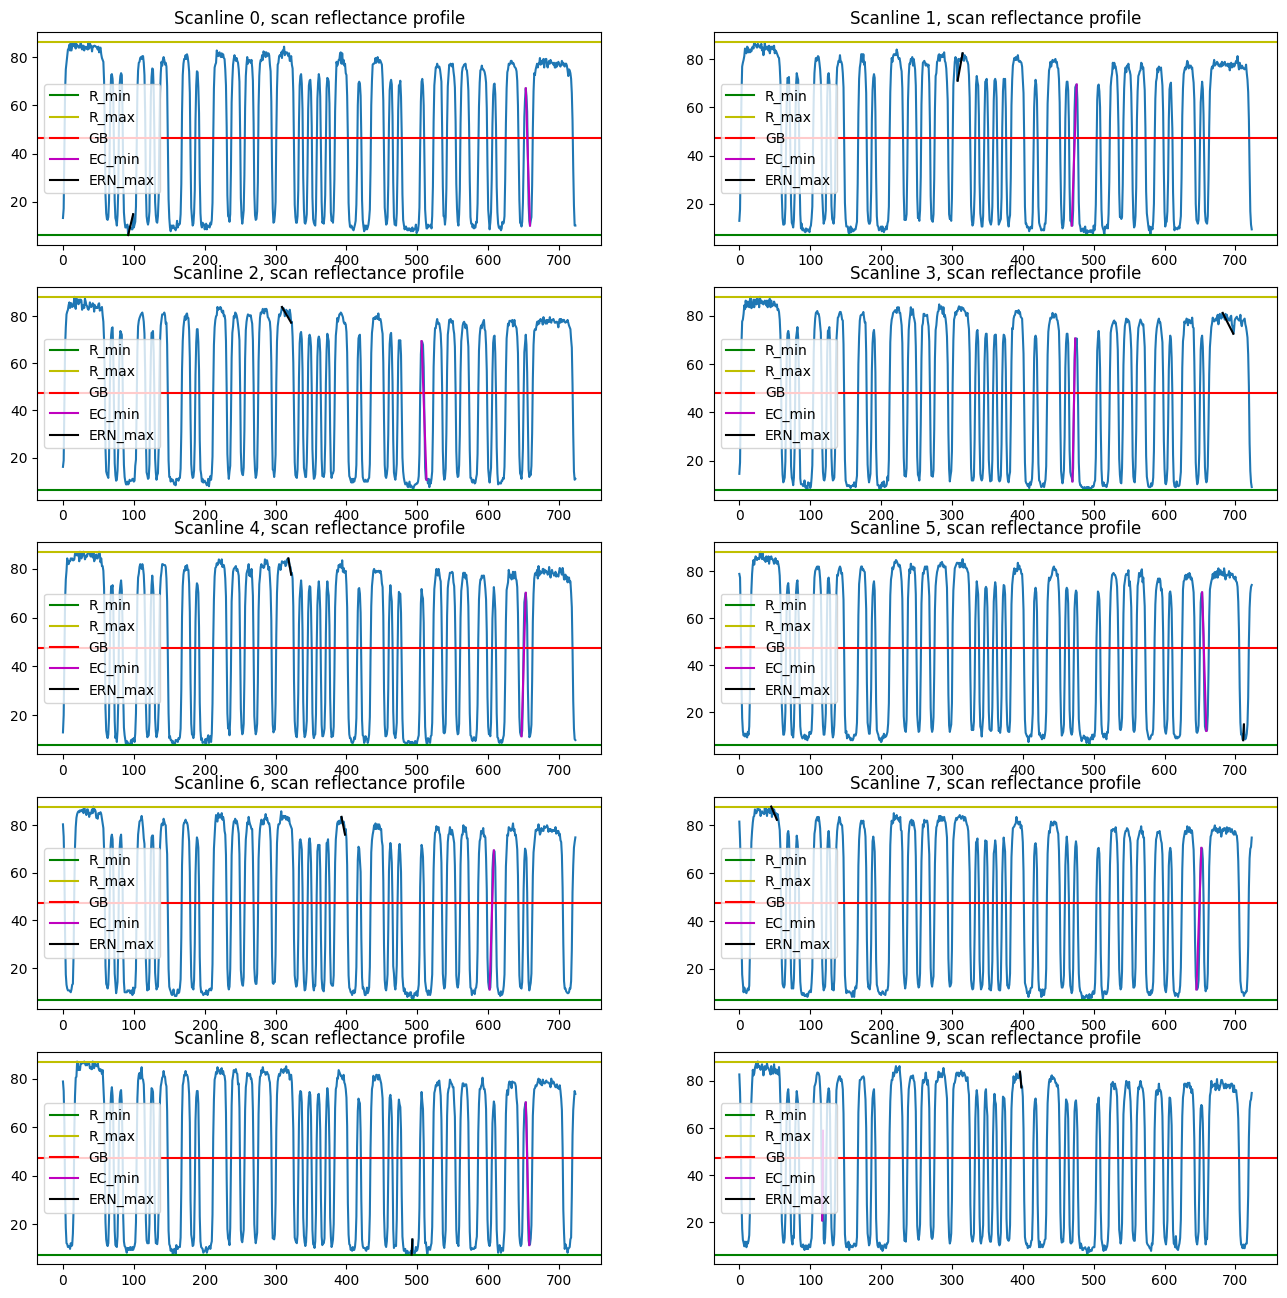

In [7]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[0]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
compute_barcode(image_path,visualization_dict='all')

In [8]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[1]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#14.BMP

Scanline grades: ['B', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 3.4
OVERALL_NUMERICAL_GRADE: B

R_min_MEAN: 14.156862745098039
R_min_MEAN_grade: A

SC_MEAN: 79.56862745098039
SC_MEAN_grade: A

EC_min_MEAN: 61.372549019607845
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7713986994485882
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.15279557265048865
DEFECT_MEAN_grade: B


In [9]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[2]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#28.BMP

Scanline grades: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 4.0
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 13.254901960784315
R_min_MEAN_grade: A

SC_MEAN: 77.84313725490196
SC_MEAN_grade: A

EC_min_MEAN: 59.68627450980392
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7668711890075863
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.04478601090500334
DEFECT_MEAN_grade: A


In [10]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[3]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#29.BMP

Scanline grades: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 4.0
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 12.627450980392156
R_min_MEAN_grade: A

SC_MEAN: 79.05882352941175
SC_MEAN_grade: A

EC_min_MEAN: 60.70588235294118
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7678652523824545
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.04411899430679099
DEFECT_MEAN_grade: A


In [11]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[4]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#15.BMP

Scanline grades: ['C', 'B', 'B', 'B', 'C', 'B', 'C', 'B', 'B', 'B']
OVERALL_NUMERICAL_VALUE: 2.7
OVERALL_NUMERICAL_GRADE: B

R_min_MEAN: 16.745098039215684
R_min_MEAN_grade: A

SC_MEAN: 76.66666666666666
SC_MEAN_grade: A

EC_min_MEAN: 59.01960784313726
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7698757655799529
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.19704412846600494
DEFECT_MEAN_grade: B


In [12]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[5]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#01.BMP

Scanline grades: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 4.0
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 13.372549019607842
R_min_MEAN_grade: A

SC_MEAN: 77.01960784313727
SC_MEAN_grade: A

EC_min_MEAN: 60.7843137254902
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7892420790853756
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.04379481299737443
DEFECT_MEAN_grade: A


In [13]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[6]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/EAN128-CONTRAST IMGB.BMP

Scanline grades: ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
OVERALL_NUMERICAL_VALUE: 2.0
OVERALL_NUMERICAL_GRADE: C

R_min_MEAN: 9.333333333333332
R_min_MEAN_grade: A

SC_MEAN: 50.31372549019609
SC_MEAN_grade: C

EC_min_MEAN: 35.05882352941176
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.6968260163621316
MODULATION_MEAN_grade: B

DEFECT_MEAN: 0.1206089865475817
DEFECT_MEAN_grade: A


In [14]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[7]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#17.BMP

Scanline grades: ['D', 'D', 'D', 'D', 'D', 'C', 'C', 'C', 'C', 'D']
OVERALL_NUMERICAL_VALUE: 1.4
OVERALL_NUMERICAL_GRADE: D

R_min_MEAN: 14.666666666666668
R_min_MEAN_grade: A

SC_MEAN: 78.58823529411765
SC_MEAN_grade: A

EC_min_MEAN: 59.72549019607843
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7600348814047674
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.2561267934732602
DEFECT_MEAN_grade: D


In [15]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[8]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#03.BMP

Scanline grades: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 4.0
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 9.647058823529415
R_min_MEAN_grade: A

SC_MEAN: 79.52941176470588
SC_MEAN_grade: A

EC_min_MEAN: 61.92156862745098
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7786729861116853
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.045345062418856906
DEFECT_MEAN_grade: A


In [16]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[9]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#16.BMP

Scanline grades: ['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'F']
OVERALL_NUMERICAL_VALUE: 0.9
OVERALL_NUMERICAL_GRADE: D

R_min_MEAN: 14.235294117647062
R_min_MEAN_grade: A

SC_MEAN: 79.45098039215686
SC_MEAN_grade: A

EC_min_MEAN: 60.156862745098046
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7573088020546457
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.2816493497330883
DEFECT_MEAN_grade: D


In [17]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[10]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#12.BMP

Scanline grades: ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F']
OVERALL_NUMERICAL_VALUE: 0.0
OVERALL_NUMERICAL_GRADE: F

R_min_MEAN: 12.23529411764706
R_min_MEAN_grade: A

SC_MEAN: 81.60784313725489
SC_MEAN_grade: A

EC_min_MEAN: 21.372549019607842
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.26193637356106764
MODULATION_MEAN_grade: F

DEFECT_MEAN: 0.057141568599272094
DEFECT_MEAN_grade: A


In [18]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[11]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#06.BMP

Scanline grades: ['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D']
OVERALL_NUMERICAL_VALUE: 1.0
OVERALL_NUMERICAL_GRADE: D

R_min_MEAN: 16.901960784313726
R_min_MEAN_grade: A

SC_MEAN: 36.86274509803921
SC_MEAN_grade: D

EC_min_MEAN: 26.627450980392155
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7225339633830631
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.07436777033237406
DEFECT_MEAN_grade: A


In [19]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[12]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#07.BMP

Scanline grades: ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F']
OVERALL_NUMERICAL_VALUE: 0.0
OVERALL_NUMERICAL_GRADE: F

R_min_MEAN: 16.666666666666668
R_min_MEAN_grade: A

SC_MEAN: 17.098039215686278
SC_MEAN_grade: F

EC_min_MEAN: 11.294117647058824
EC_min_MEAN_grade: F

MODULATION_MEAN: 0.6609891271519179
MODULATION_MEAN_grade: B

DEFECT_MEAN: 0.12356068995603871
DEFECT_MEAN_grade: A


/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#13.BMP

Scanline grades: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 4.0
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 11.215686274509803
R_min_MEAN_grade: A

SC_MEAN: 81.01960784313727
SC_MEAN_grade: A

EC_min_MEAN: 62.03921568627451
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7657764460903674
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.0678081536487814
DEFECT_MEAN_grade: A


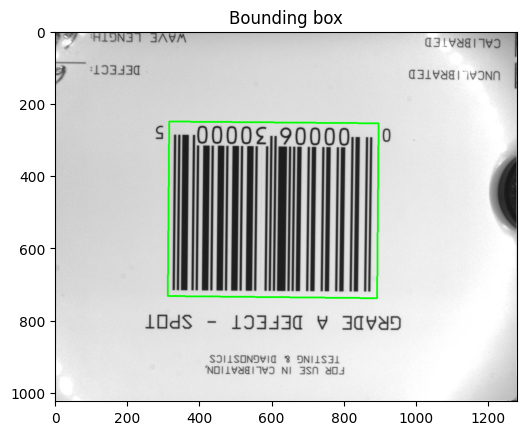

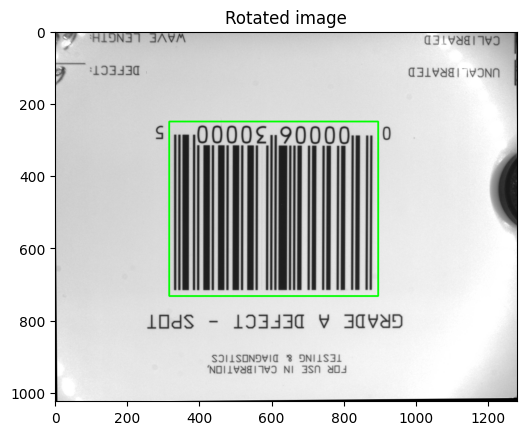

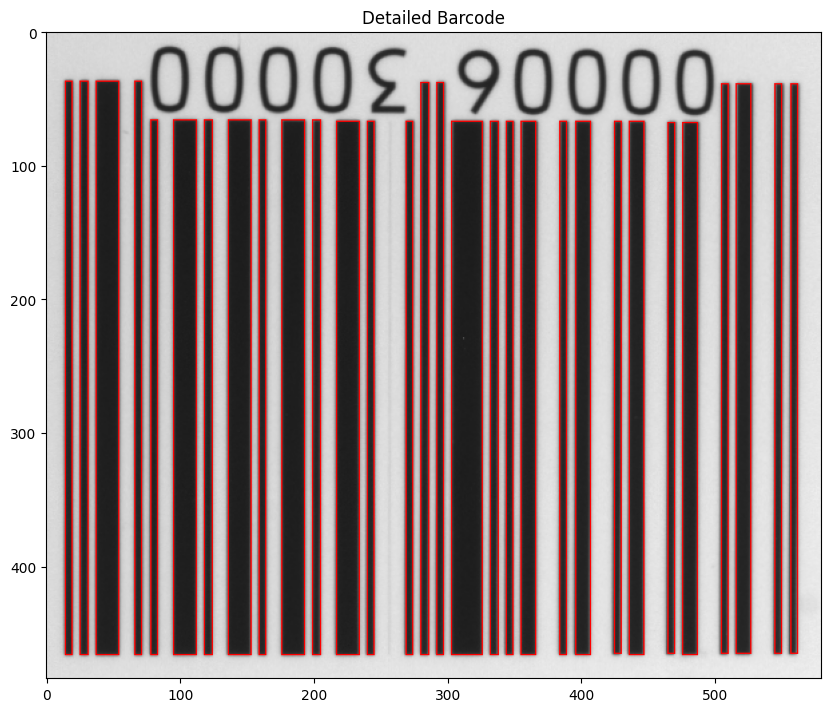

({'bb_points_sorted': array([[316., 250.],
         [896., 255.],
         [312., 733.],
         [892., 739.]], dtype=float32),
  'bb_width': 580,
  'bb_height': 484,
  'threshold': 115.0},
 {'image_rot': array([[[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [ 77,  77,  77],
          [  0,   0,   0],
          [  0,   0,   0]],
  
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [ 89,  89,  89],
          [  0,   0,   0],
          [  0,   0,   0]],
  
         [[ 41,  41,  41],
          [ 41,  41,  41],
          [ 46,  46,  46],
          ...,
          [103, 103, 103],
          [  0,   0,   0],
          [  0,   0,   0]],
  
         ...,
  
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
  
         [[  0,   0,   0],
          [  0,   0,   0],
 

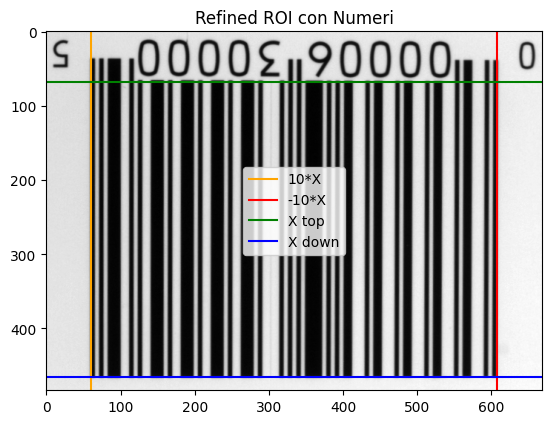

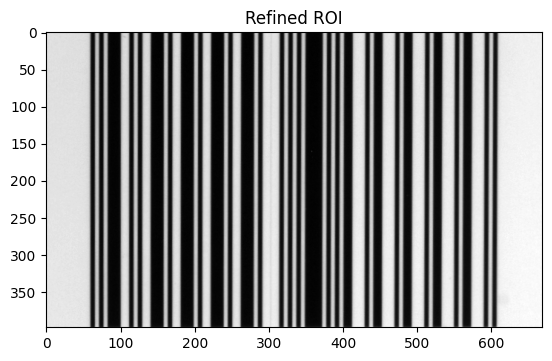

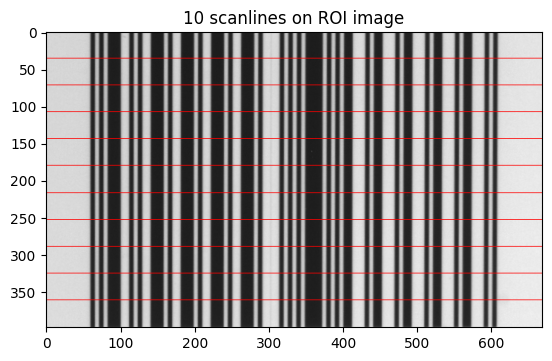

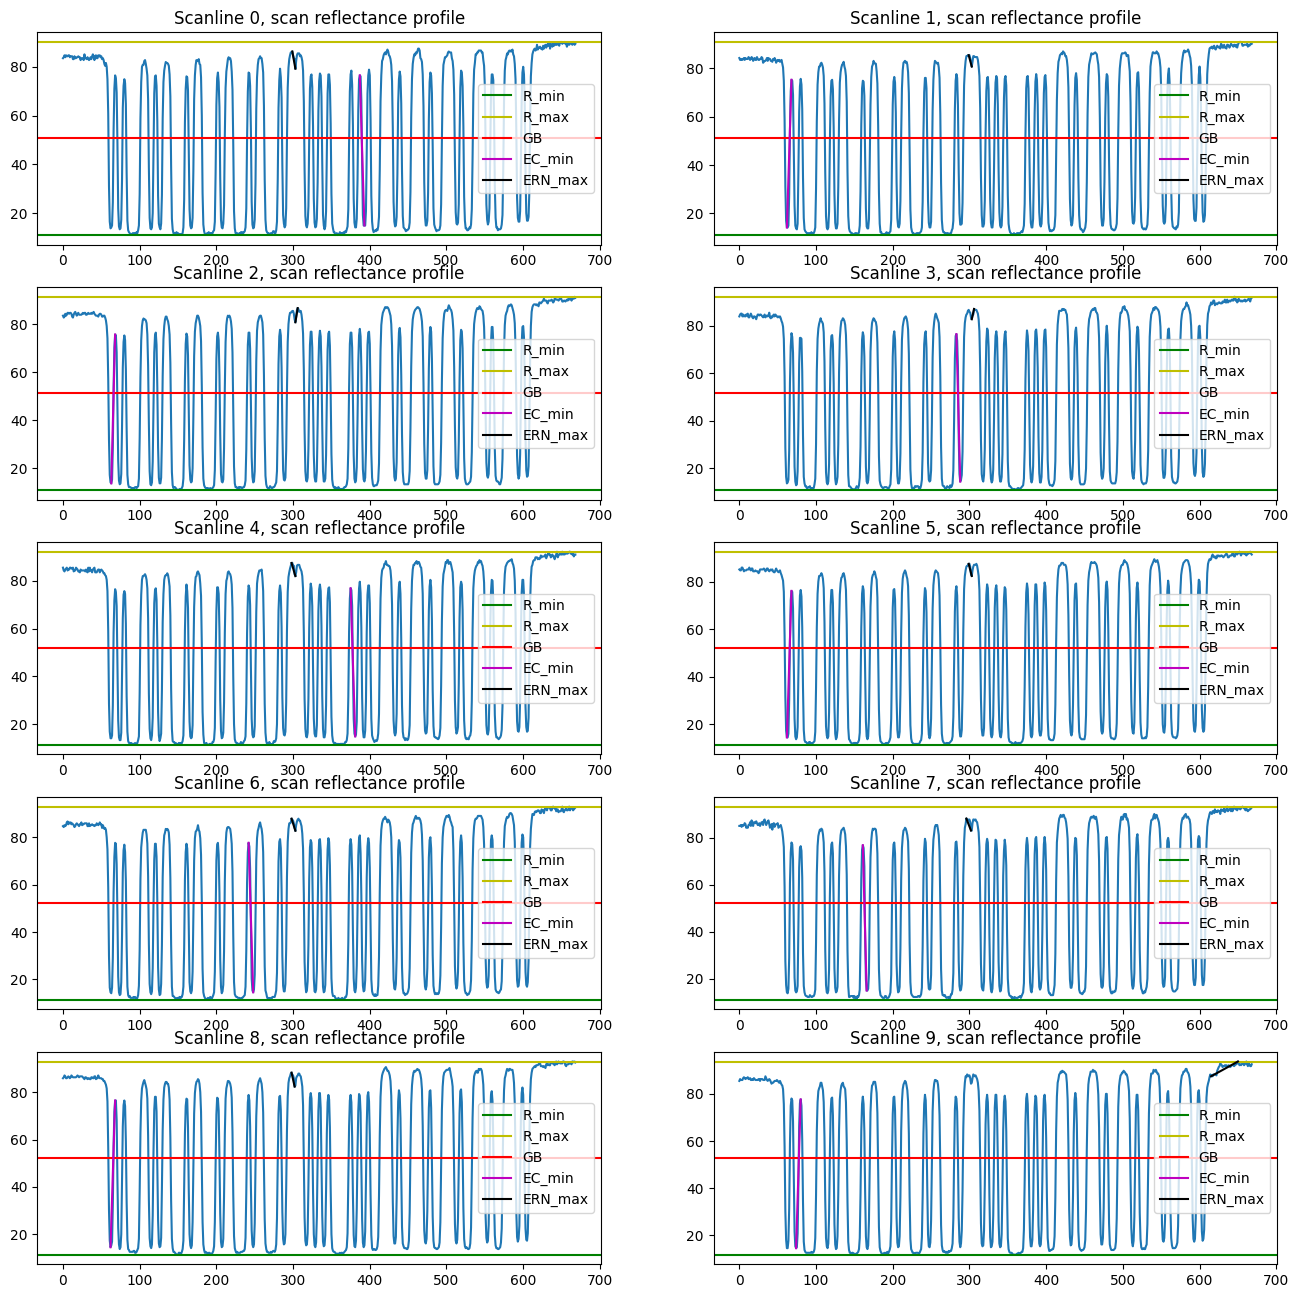

In [22]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[13]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
compute_barcode(image_path,visualization_dict='all')

In [21]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[14]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/EAN128-LOW DECODABILITY IMGB.BMP

Scanline grades: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 4.0
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 6.823529411764706
R_min_MEAN_grade: A

SC_MEAN: 87.01960784313725
SC_MEAN_grade: A

EC_min_MEAN: 65.37254901960785
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7512699021995795
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.06978838165597165
DEFECT_MEAN_grade: A


In [23]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[15]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#05.BMP

Scanline grades: ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
OVERALL_NUMERICAL_VALUE: 2.0
OVERALL_NUMERICAL_GRADE: C

R_min_MEAN: 16.745098039215687
R_min_MEAN_grade: A

SC_MEAN: 51.411764705882355
SC_MEAN_grade: C

EC_min_MEAN: 38.23529411764705
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7437784128868092
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.0700473330308629
DEFECT_MEAN_grade: A


In [24]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[16]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#11.BMP

Scanline grades: ['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D']
OVERALL_NUMERICAL_VALUE: 1.0
OVERALL_NUMERICAL_GRADE: D

R_min_MEAN: 10.352941176470589
R_min_MEAN_grade: A

SC_MEAN: 78.90196078431373
SC_MEAN_grade: A

EC_min_MEAN: 35.96078431372548
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.4558725437854558
MODULATION_MEAN_grade: D

DEFECT_MEAN: 0.05478113911971869
DEFECT_MEAN_grade: A


In [25]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[17]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/I25-MASTER GRADE IMGB.BMP

Scanline grades: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 4.0
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 4.627450980392156
R_min_MEAN_grade: A

SC_MEAN: 81.76470588235296
SC_MEAN_grade: A

EC_min_MEAN: 59.647058823529406
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.729530085348163
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.07190759501114195
DEFECT_MEAN_grade: A


In [26]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[18]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/I25-LOW DECODABILITY IMGB.BMP

Scanline grades: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 3.9
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 4.627450980392156
R_min_MEAN_grade: A

SC_MEAN: 84.15686274509804
SC_MEAN_grade: A

EC_min_MEAN: 62.47058823529411
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7424023247111203
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.10678492053904143
DEFECT_MEAN_grade: A


In [27]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[19]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/C39_7.5UP.BMP

Scanline grades: ['A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 3.9
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 0.23529411764705882
R_min_MEAN_grade: A

SC_MEAN: 76.43137254901961
SC_MEAN_grade: A

EC_min_MEAN: 54.196078431372555
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7091561206343975
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.08210110862586942
DEFECT_MEAN_grade: A


In [28]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[20]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/C39_4.4UP.BMP

Scanline grades: ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
OVERALL_NUMERICAL_VALUE: 2.0
OVERALL_NUMERICAL_GRADE: C

R_min_MEAN: 1.1372549019607845
R_min_MEAN_grade: A

SC_MEAN: 73.33333333333334
SC_MEAN_grade: A

EC_min_MEAN: 43.17647058823529
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.5887808491084232
MODULATION_MEAN_grade: C

DEFECT_MEAN: 0.0636086581587431
DEFECT_MEAN_grade: A


In [29]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[21]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#10.BMP

Scanline grades: ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
OVERALL_NUMERICAL_VALUE: 2.0
OVERALL_NUMERICAL_GRADE: C

R_min_MEAN: 14.156862745098039
R_min_MEAN_grade: A

SC_MEAN: 79.76470588235294
SC_MEAN_grade: A

EC_min_MEAN: 41.68627450980392
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.5226522823967017
MODULATION_MEAN_grade: C

DEFECT_MEAN: 0.04223001782287043
DEFECT_MEAN_grade: A


In [30]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[22]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#04.BMP

Scanline grades: ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
OVERALL_NUMERICAL_VALUE: 3.0
OVERALL_NUMERICAL_GRADE: B

R_min_MEAN: 12.117647058823529
R_min_MEAN_grade: A

SC_MEAN: 67.25490196078432
SC_MEAN_grade: B

EC_min_MEAN: 51.92156862745098
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7720543035700531
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.05184468623471061
DEFECT_MEAN_grade: A


In [31]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[23]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/EAN-UPC-EAN-13 MASTER GRADE IMGB.BMP

Scanline grades: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 4.0
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 7.882352941176469
R_min_MEAN_grade: A

SC_MEAN: 77.33333333333334
SC_MEAN_grade: A

EC_min_MEAN: 56.98039215686274
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7368771007046163
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.07031856969238623
DEFECT_MEAN_grade: A


In [32]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[24]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/EAN-UPC-CONTRAST IMGB.BMP

Scanline grades: ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
OVERALL_NUMERICAL_VALUE: 2.0
OVERALL_NUMERICAL_GRADE: C

R_min_MEAN: 10.705882352941178
R_min_MEAN_grade: A

SC_MEAN: 46.23529411764706
SC_MEAN_grade: C

EC_min_MEAN: 33.803921568627445
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7315534193279983
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.08980376780033018
DEFECT_MEAN_grade: A


In [33]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[25]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/EAN-UPC-DECODABILITY IMGB.BMP

Scanline grades: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 4.0
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 8.196078431372548
R_min_MEAN_grade: A

SC_MEAN: 76.86274509803921
SC_MEAN_grade: A

EC_min_MEAN: 57.921568627450974
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7537256528431059
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.05409034188616273
DEFECT_MEAN_grade: A


In [34]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[26]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/I25-CONTRAST IMGB.BMP

Scanline grades: ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
OVERALL_NUMERICAL_VALUE: 2.0
OVERALL_NUMERICAL_GRADE: C

R_min_MEAN: 7.84313725490196
R_min_MEAN_grade: A

SC_MEAN: 53.607843137254896
SC_MEAN_grade: C

EC_min_MEAN: 39.529411764705884
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7374437504117626
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.0980327921923028
DEFECT_MEAN_grade: A


In [35]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[27]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/I25-DEFECTS IMGB.BMP

Scanline grades: ['F', 'F', 'F', 'D', 'D', 'F', 'F', 'F', 'F', 'F']
OVERALL_NUMERICAL_VALUE: 0.2
OVERALL_NUMERICAL_GRADE: F

R_min_MEAN: 4.862745098039215
R_min_MEAN_grade: A

SC_MEAN: 82.50980392156865
SC_MEAN_grade: A

EC_min_MEAN: 32.43137254901961
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.39297603831261374
MODULATION_MEAN_grade: F

DEFECT_MEAN: 0.07509842653695478
DEFECT_MEAN_grade: A


In [37]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[28]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/C128_4.4UP.BMP

Scanline grades: ['B', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'B']
OVERALL_NUMERICAL_VALUE: 2.9
OVERALL_NUMERICAL_GRADE: B

R_min_MEAN: 7.921568627450981
R_min_MEAN_grade: A

SC_MEAN: 73.45098039215685
SC_MEAN_grade: A

EC_min_MEAN: 45.01960784313726
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.6130123058291123
MODULATION_MEAN_grade: B

DEFECT_MEAN: 0.11105010218844151
DEFECT_MEAN_grade: A


In [38]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[29]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/C128_7.5UP.BMP

Scanline grades: ['C', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
OVERALL_NUMERICAL_VALUE: 2.9
OVERALL_NUMERICAL_GRADE: B

R_min_MEAN: 0.39215686274509803
R_min_MEAN_grade: A

SC_MEAN: 75.41176470588235
SC_MEAN_grade: A

EC_min_MEAN: 47.21568627450981
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.6262455936944757
MODULATION_MEAN_grade: B

DEFECT_MEAN: 0.08156657925367475
DEFECT_MEAN_grade: A


In [39]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[30]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/EAN128-MASTER IMGB.BMP

Scanline grades: ['B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B']
OVERALL_NUMERICAL_VALUE: 3.8
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 5.76470588235294
R_min_MEAN_grade: A

SC_MEAN: 82.15686274509804
SC_MEAN_grade: A

EC_min_MEAN: 59.21568627450979
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7209764405660009
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.09311958334284892
DEFECT_MEAN_grade: A


/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/EAN-UPC-DEFECTS IMGB.BMP

Scanline grades: ['C', 'C', 'B', 'C', 'B', 'B', 'B', 'C', 'C', 'B']
OVERALL_NUMERICAL_VALUE: 2.5
OVERALL_NUMERICAL_GRADE: B

R_min_MEAN: 7.84313725490196
R_min_MEAN_grade: A

SC_MEAN: 80.27450980392157
SC_MEAN_grade: A

EC_min_MEAN: 57.72549019607842
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7191001461681876
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.20124684951918947
DEFECT_MEAN_grade: C


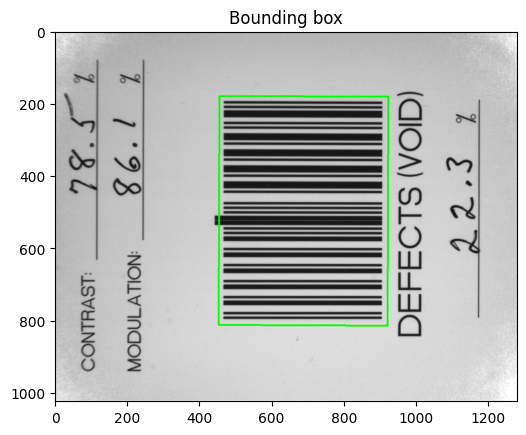

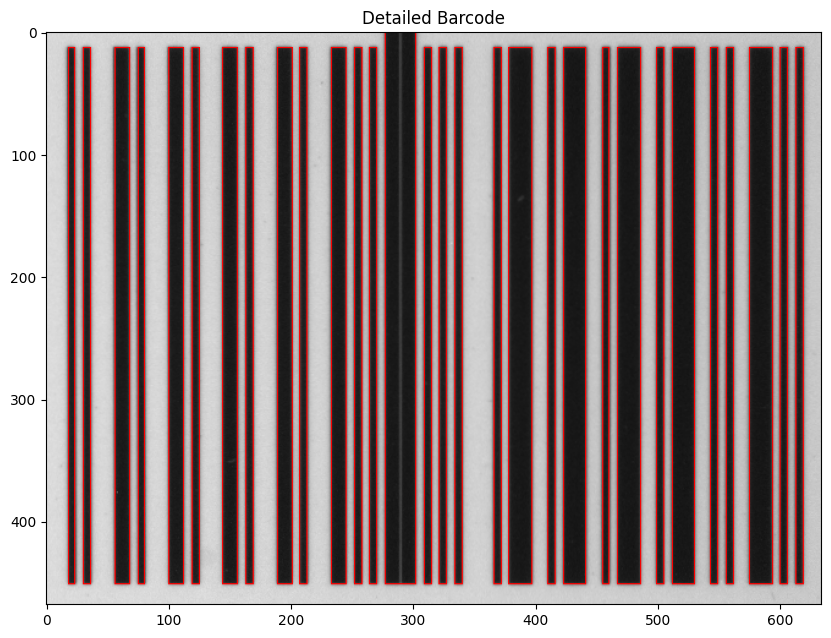

({'bb_points_sorted': array([[455., 180.],
         [923., 181.],
         [453., 813.],
         [921., 815.]], dtype=float32),
  'bb_width': 468,
  'bb_height': 634,
  'threshold': 122.0},
 {'image_rot': array([[[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [214, 214, 214],
          [254, 254, 254],
          [  8,   8,   8]],
  
         [[ 43,  43,  43],
          [ 42,  42,  42],
          [ 51,  51,  51],
          ...,
          [221, 221, 221],
          [254, 254, 254],
          [  8,   8,   8]],
  
         [[230, 230, 230],
          [227, 227, 227],
          [234, 234, 234],
          ...,
          [222, 222, 222],
          [254, 254, 254],
          [  8,   8,   8]],
  
         ...,
  
         [[  0,   0,   0],
          [ 64,  64,  64],
          [255, 255, 255],
          ...,
          [216, 216, 216],
          [219, 219, 219],
          [219, 219, 219]],
  
         [[  0,   0,   0],
          [ 64,  64,  64],
 

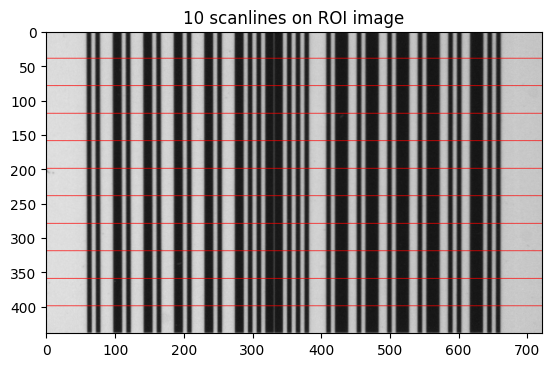

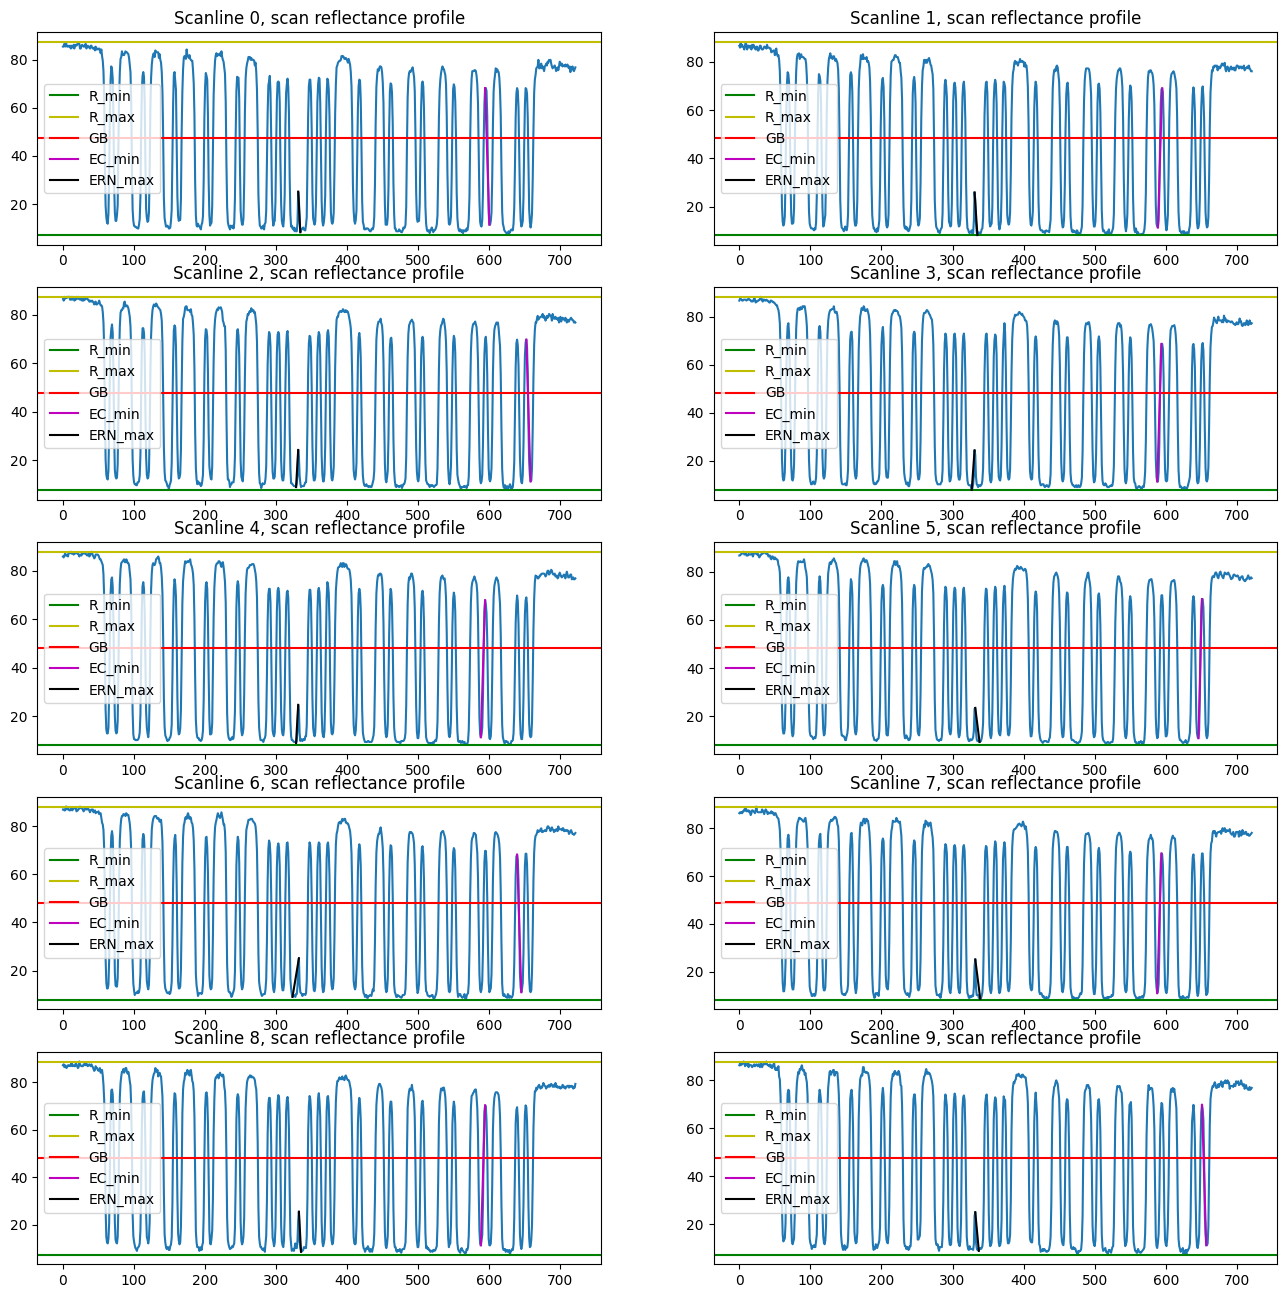

In [41]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[31]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
compute_barcode(image_path,visualization_dict='all')

In [42]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[32]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#21.BMP

Scanline grades: ['C', 'D', 'D', 'D', 'D', 'C', 'C', 'C', 'D', 'D']
OVERALL_NUMERICAL_VALUE: 1.4
OVERALL_NUMERICAL_GRADE: D

R_min_MEAN: 15.568627450980392
R_min_MEAN_grade: A

SC_MEAN: 76.43137254901958
SC_MEAN_grade: A

EC_min_MEAN: 57.68627450980394
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7548255546160272
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.2524131105179982
DEFECT_MEAN_grade: D


In [43]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[33]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#09.BMP

Scanline grades: ['C', 'B', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'C']
OVERALL_NUMERICAL_VALUE: 2.2
OVERALL_NUMERICAL_GRADE: C

R_min_MEAN: 13.92156862745098
R_min_MEAN_grade: A

SC_MEAN: 79.17647058823528
SC_MEAN_grade: A

EC_min_MEAN: 47.13725490196079
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.5954077553744203
MODULATION_MEAN_grade: C

DEFECT_MEAN: 0.04403271631508409
DEFECT_MEAN_grade: A


In [44]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[34]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#08.BMP

Scanline grades: ['A', 'B', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 3.8
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 13.80392156862745
R_min_MEAN_grade: A

SC_MEAN: 79.05882352941175
SC_MEAN_grade: A

EC_min_MEAN: 55.72549019607844
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7048914666561803
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.048115294351393945
DEFECT_MEAN_grade: A


In [45]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[35]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#20.BMP

Scanline grades: ['C', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C']
OVERALL_NUMERICAL_VALUE: 2.8
OVERALL_NUMERICAL_GRADE: B

R_min_MEAN: 15.843137254901958
R_min_MEAN_grade: A

SC_MEAN: 76.7843137254902
SC_MEAN_grade: A

EC_min_MEAN: 58.627450980392155
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7635406016681039
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.1885258157333583
DEFECT_MEAN_grade: B


In [46]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[36]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/C39_7.5LOW.BMP

Scanline grades: ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F']
OVERALL_NUMERICAL_VALUE: 0.0
OVERALL_NUMERICAL_GRADE: F

R_min_MEAN: 0.1568627450980392
R_min_MEAN_grade: A

SC_MEAN: 75.92156862745098
SC_MEAN_grade: A

EC_min_MEAN: 47.372549019607845
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.6240311518222108
MODULATION_MEAN_grade: B

DEFECT_MEAN: 0.3399363875776991
DEFECT_MEAN_grade: F


In [47]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[37]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#22.BMP

Scanline grades: ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'D', 'F']
OVERALL_NUMERICAL_VALUE: 0.1
OVERALL_NUMERICAL_GRADE: F

R_min_MEAN: 15.019607843137255
R_min_MEAN_grade: A

SC_MEAN: 77.2156862745098
SC_MEAN_grade: A

EC_min_MEAN: 58.70588235294118
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7604680600830813
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.3422956755434531
DEFECT_MEAN_grade: F


In [48]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[38]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/EAN128-DEFECTS IMGB.BMP

Scanline grades: ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'D']
OVERALL_NUMERICAL_VALUE: 0.1
OVERALL_NUMERICAL_GRADE: F

R_min_MEAN: 5.529411764705882
R_min_MEAN_grade: A

SC_MEAN: 80.58823529411765
SC_MEAN_grade: A

EC_min_MEAN: 58.47058823529411
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7257044848508879
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.3168690827809509
DEFECT_MEAN_grade: F


In [49]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[39]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#23.BMP

Scanline grades: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 4.0
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 12.549019607843137
R_min_MEAN_grade: A

SC_MEAN: 78.43137254901961
SC_MEAN_grade: A

EC_min_MEAN: 59.96078431372548
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7646189977993896
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.06431924508502843
DEFECT_MEAN_grade: A


In [50]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[40]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/C128_4.4LOW.BMP

Scanline grades: ['D', 'C', 'D', 'F', 'D', 'D', 'D', 'D', 'F', 'D']
OVERALL_NUMERICAL_VALUE: 0.9
OVERALL_NUMERICAL_GRADE: D

R_min_MEAN: 8.352941176470587
R_min_MEAN_grade: A

SC_MEAN: 73.37254901960783
SC_MEAN_grade: A

EC_min_MEAN: 40.196078431372555
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.5485784136717923
MODULATION_MEAN_grade: C

DEFECT_MEAN: 0.27430877621030425
DEFECT_MEAN_grade: D


In [51]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[41]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#27.BMP

Scanline grades: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 4.0
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 12.0
R_min_MEAN_grade: A

SC_MEAN: 78.23529411764707
SC_MEAN_grade: A

EC_min_MEAN: 59.372549019607845
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7589227212306369
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.04760264599874535
DEFECT_MEAN_grade: A


In [52]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[42]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/C39_4.4LOW.BMP

Scanline grades: ['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D']
OVERALL_NUMERICAL_VALUE: 1.0
OVERALL_NUMERICAL_GRADE: D

R_min_MEAN: 1.7254901960784312
R_min_MEAN_grade: A

SC_MEAN: 73.33333333333334
SC_MEAN_grade: A

EC_min_MEAN: 34.03921568627452
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.4643966909102472
MODULATION_MEAN_grade: D

DEFECT_MEAN: 0.20340539184183867
DEFECT_MEAN_grade: C


In [53]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[43]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#26.BMP

Scanline grades: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 4.0
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 12.196078431372548
R_min_MEAN_grade: A

SC_MEAN: 78.3529411764706
SC_MEAN_grade: A

EC_min_MEAN: 60.117647058823536
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7673238814991088
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.04546972720678707
DEFECT_MEAN_grade: A


In [54]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[44]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#32.BMP

Scanline grades: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 4.0
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 10.980392156862745
R_min_MEAN_grade: A

SC_MEAN: 79.88235294117648
SC_MEAN_grade: A

EC_min_MEAN: 61.41176470588236
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7688767169591112
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.05437505149364742
DEFECT_MEAN_grade: A


In [55]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[45]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#18.BMP

Scanline grades: ['B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 3.9
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 15.019607843137255
R_min_MEAN_grade: A

SC_MEAN: 79.45098039215685
SC_MEAN_grade: A

EC_min_MEAN: 60.3921568627451
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7601516048567516
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.13383448240305412
DEFECT_MEAN_grade: A


In [56]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[46]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#24.BMP

Scanline grades: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 4.0
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 13.843137254901961
R_min_MEAN_grade: A

SC_MEAN: 77.29411764705881
SC_MEAN_grade: A

EC_min_MEAN: 58.941176470588246
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7626013349571342
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.04867578045022765
DEFECT_MEAN_grade: A


In [57]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[47]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#30.BMP

Scanline grades: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 4.0
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 13.098039215686276
R_min_MEAN_grade: A

SC_MEAN: 79.01960784313725
SC_MEAN_grade: A

EC_min_MEAN: 60.98039215686275
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7718478466444099
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.05006885481501738
DEFECT_MEAN_grade: A


In [58]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[48]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/C128_7.5LOW.BMP

Scanline grades: ['C', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
OVERALL_NUMERICAL_VALUE: 2.1
OVERALL_NUMERICAL_GRADE: C

R_min_MEAN: 0.8627450980392158
R_min_MEAN_grade: A

SC_MEAN: 73.52941176470588
SC_MEAN_grade: A

EC_min_MEAN: 45.72549019607843
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.6219466002731833
MODULATION_MEAN_grade: B

DEFECT_MEAN: 0.21447096498644025
DEFECT_MEAN_grade: C


In [59]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[49]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#31.BMP

Scanline grades: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 4.0
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 11.137254901960784
R_min_MEAN_grade: A

SC_MEAN: 80.70588235294119
SC_MEAN_grade: A

EC_min_MEAN: 62.3921568627451
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7731622726966194
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.04423558786904967
DEFECT_MEAN_grade: A


In [60]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[50]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#25.BMP

Scanline grades: ['A', 'A', 'A', 'D', 'A', 'A', 'A', 'A', 'A', 'A']
OVERALL_NUMERICAL_VALUE: 3.7
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 12.156862745098037
R_min_MEAN_grade: A

SC_MEAN: 80.70588235294117
SC_MEAN_grade: A

EC_min_MEAN: 61.76470588235294
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7652923750056051
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.06891649258996908
DEFECT_MEAN_grade: A


In [61]:
image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{images_paths[51]}'
print(image_path)
print()
detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path)
pretty_print(overall_quality_parameters_dict)
#compute_barcode(image_path,visualization_dict='all')

/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/UPC#19.BMP

Scanline grades: ['B', 'A', 'A', 'B', 'A', 'B', 'B', 'A', 'B', 'A']
OVERALL_NUMERICAL_VALUE: 3.5
OVERALL_NUMERICAL_GRADE: A

R_min_MEAN: 18.470588235294116
R_min_MEAN_grade: A

SC_MEAN: 74.27450980392156
SC_MEAN_grade: A

EC_min_MEAN: 56.66666666666667
EC_min_MEAN_grade: A

MODULATION_MEAN: 0.7629931970195079
MODULATION_MEAN_grade: A

DEFECT_MEAN: 0.15788067924501142
DEFECT_MEAN_grade: B


### Create the Output files for each image:

In [64]:
for image_name in images_paths:
    image_path = f'/Users/gabrieletassinari/Desktop/BarcodeVerification/dati/{image_name}'
    detection_dict, rotation_dict, refinement_dict, overall_quality_parameters_dict = compute_barcode(image_path, 
                                                                                               create_output_file=True,
                                                                                               output_folder_path='/Users/gabrieletassinari/Desktop/BarcodeVerification/out/')
    
print("Success")

Success
